In [49]:
from get_datasets.Get_Datasets import get_data_array, get_datasets
from src.Evolutionary_Algorithm import create_next_population

import matplotlib.pyplot as plt
import numpy as np


In [11]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_array(train_dir='chest_xray_new/train',
                                                                test_dir='chest_xray_new/test')

  0%|          | 0/3883 [00:00<?, ?it/s]

  0%|          | 0/2698 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

In [12]:
train_ds, val_ds, test_ds = get_datasets(x_train, y_train, x_test, y_test, x_val, y_val)

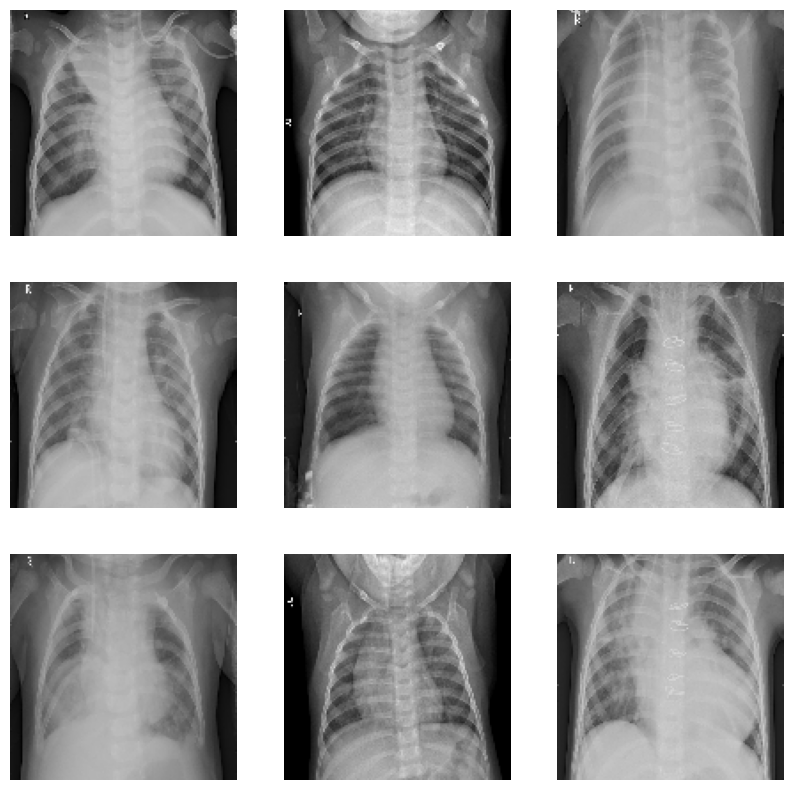

In [13]:
sample_images, _ = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i, image in enumerate(sample_images[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("int"))
    plt.axis("off")

In [14]:
array = np.random.randint(0, 2, (9, 18))

In [15]:
array

array([[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]])

In [16]:
from src.Create_Model import create_model, model_summary
from src.Train_Model import train_model

test_model = create_model(model_array=array)
model_summary(test_model)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_53 (Conv2D)             (None, 64, 64, 16)   208         ['rescaling_1[0][0]']   

In [1]:
test_model = train_model(train_ds, val_ds, test_model)

NameError: name 'train_model' is not defined

In [38]:
mask = np.random.randint(0, 2, (9, 18), dtype=np.bool_)

In [42]:
mask = mask = np.random.permutation(np.concatenate((np.zeros(9*18//2),
                                                 np.ones(9*18//2)))).reshape(9, 18).astype(np.bool_)

In [43]:
mask


array([[False, False,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True, False, False, False, False,  True,  True],
       [False, False, False,  True,  True, False, False, False, False,
         True, False, False,  True, False, False,  True, False,  True],
       [False,  True, False,  True, False,  True,  True,  True, False,
        False,  True, False, False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True, False,
         True, False,  True, False, False, False,  True,  True, False],
       [ True,  True,  True,  True,  True,  True, False, False,  True,
        False, False,  True, False,  True,  True, False,  True,  True],
       [ True, False,  True,  True, False, False, False,  True,  True,
         True, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True,  True,  True, False, False,  True,  True],

In [44]:
num_true = np.sum(mask)

In [45]:
num_true

81

In [53]:
array1 = np.random.randint(0, 2, (9, 18))
array2 = np.random.randint(0, 2, (9, 18))
next_g =  create_next_population(array1, array2, population=10)

In [54]:
next_g.shape


(10, 9, 18)